In [9]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [10]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e already exists
ur5e does not exist


In [11]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [12]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

renderer already exists


In [13]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

#print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [14]:
'''# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 
    '''


'# Generate trajectory\n\n#startpos = np.array([0, 0, 0])\nT0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision\nT1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])\ndt = 0.002 \nendTime = 0.3\nn = int(endTime/dt)\n\nif \'ctr\' not in locals():\n    ctr = np.array([])\n    times = np.array([])\n    startTime = 0\n    scalingX = 5000\n    scalingY = 2500\n    movementX = 0.4\n    movementY = 0.0\n\n\n\n    for i in tqdm(range(0, poi.shape[0]-1)):\n        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)\n        endTime = distance*0.05\n        n = int(endTime/dt)\n        T0.t[0] = movementX + poi[i, 0]/scalingX\n        T0.t[1] = movementY + poi[i, 1]/scalingY\n        T1.t[0] = movementX + poi[i+1, 0]/scalingX\n        T1.t[1] = movementY + poi[i+1, 1]/scalingY\n        trajectory = rtb.ctraj(T0, T1, n)\n        time = np.linspace(startT

[-1.47927351 -1.74426021 -2.02947212  2.202936    1.57079633  3.05006984]



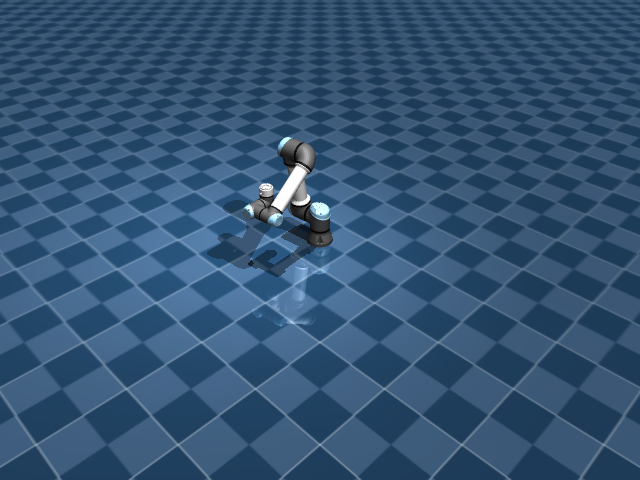

In [27]:
#Admittance_controller_using_torque_actuators.ipynb
# Use the inverse kinematics to make a start pose for the robot
initial_pose = np.array([0.3*np.sin(0)-0.1, 0.3*np.sin(0)*np.cos(0)-0.3, 0.1*np.sin(0)+0.5, 0.0, 0.0, 0.0])
T_target = SE3(initial_pose[0], initial_pose[1], initial_pose[2]) * sm.SE3.RPY([0, 0, 0])
sol = ur5e.invkin(T_target)
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[-1.47927366 -1.7442602  -2.02947217  2.20293603  1.57079633  3.05006999]


In [16]:
import numpy as np
import mujoco
from tqdm import tqdm
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Cartesian Admittance Control Parameters (Critically Damped)
# ------------------------------------------------------------------
# Virtual inertia (from the robot’s model) for translation and rotation:
M_diag = np.array([200.0, 200.0, 200.0, 15.0, 15.0, 15.0])  # [m_x, m_y, m_z, m_roll, m_pitch, m_yaw]
M = np.diag(M_diag)
K_trans = 1000.0
K_rot = 15.0
# For a critically damped second-order system (ζ = 1):
omega_n = np.sqrt(K_trans / M_diag[0])  # Natural frequency (rad/s)
# For translation (first 3 components):
#K_trans = M_diag[0]       
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = K_rot         # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24
# 
# Assemble effective gain matrices (6x6 diagonal)
K_eff = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D_eff = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])

# ------------------------------------------------------------------
# Simulation Parameters
# ------------------------------------------------------------------
time_log = []
force_log = []  # external force (first 3 components)
duration = 25    # seconds (5s segments for force/torque profiles)
framerate = 30   # Hz
stepsize = ur5e.m.opt.timestep  # simulation time step
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Arrays for logging and video
frames = []
positions_as_quat = np.zeros((n_steps, 7))   # [x,y,z, qx,qy,qz,qw]
positions_as_rpy  = np.zeros((n_steps, 6))   # [x,y,z, roll,pitch,yaw]
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))
torques           = np.zeros((n_steps, 6))
tau_log           = np.zeros((n_steps, 6))
q_log             = np.zeros((n_steps, 6))
f_all_sensor      = np.zeros((n_steps, 3))
mu_all_sensor     = np.zeros((n_steps, 3))
f_all = np.zeros((n_steps, 3))
mu_all = np.zeros((n_steps, 3))

def skew_symmetric(v):
    return np.array([[    0,   -v[2],  v[1]],
                     [ v[2],       0, -v[0]],
                     [-v[1],   v[0],     0]])

def wrench_trans(wrench_A, T_A_B):
    R_A_B = T_A_B[:3, :3]
    p_A_B = T_A_B[:3, 3]
    adj = np.zeros((6,6))
    adj[:3, :3] = R_A_B
    adj[3:6, :3] = skew_symmetric(p_A_B) @ R_A_B
    adj[3:6, 3:6] = R_A_B
    return adj.T @ wrench_A

# ------------------------------------------------------------------
# Desired Cartesian Trajectory in the Compliance Frame
# ------------------------------------------------------------------
# The desired trajectory (in the compliance frame) is given by:
#   x(t) = 0.3 sin(t/3)
#   y(t) = 0.3 sin(t/3) cos(t/3)
#   z(t) = 0.1 sin(t)
#
# And then the target pose in world coordinates is:
#   desired_translation = computed translation + compliance_offset,
# with compliance_offset = [0, 0.1, 0.2]
compliance_offset = np.array([0.0, 0.1, 0.2])
compliance_frame = np.eye(4)
compliance_frame[:3, 3] = compliance_offset
print("Compliance Frame:\n", compliance_frame)

p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))

for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation in the compliance frame:
    x_des = 0.3 * np.sin(t/3)-0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3)-0.3
    z_des = 0.1 * np.sin(t)+0.5
    des_trans = np.array([x_des, y_des, z_des])# + compliance_offset
    # Orientation is fixed (zero rpy)
    des_orient = np.zeros(3)
    
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute derivatives (for translation; orientation derivatives are zero)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    # For y, note: y = 0.3 sin(t/3) cos(t/3) = 0.15 sin(2t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    des_trans_dot = np.array([dx_des, dy_des, dz_des])
    des_trans_ddot = np.array([ddx_des, ddy_des, ddz_des])
    
    dp_des[i, :] = np.concatenate((des_trans_dot, np.zeros(3)))
    ddp_des[i, :] = np.concatenate((des_trans_ddot, np.zeros(3)))
    

# ------------------------------------------------------------------
# External Force/Torque Profile
# ------------------------------------------------------------------
def get_external_wrench(t):
    # Returns a 6D wrench [f_x, f_y, f_z, mu_x, mu_y, mu_z]
    if t <= 5:
        return np.zeros(6)
    elif t <= 10:
        return np.array([1, 2, 3, 0, 0, 0])
    elif t <= 15:
        return np.zeros(6)
    elif t <= 20:
        return np.array([0, 0, 0, 1, 0.5, 1])
    elif t <= 25:
        return np.zeros(6)
    else:
        return np.zeros(6)

# ------------------------------------------------------------------
# Reset and Initialize Simulation
# ------------------------------------------------------------------
# Set the initial Cartesian pose (in world frame) for the robot.

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

#q_des = np.array([0.0, -1.57, 1.57, 0.0, 1.57, 0.0])  # Adjust these angles for your robot
#ur5e.d.qpos[:] = q_des


# ------------------------------------------------------------------
# Main Simulation Loop
# ------------------------------------------------------------------
progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current Cartesian pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    
    # Compute the current Cartesian pose in the compliance frame:
    # (Subtract the compliance offset to get into the compliance frame)
    current_trans = tcp_pos.t #- compliance_offset
    current_orient = tcp_pos.rpy(order='xyz')
    current_pose = np.concatenate((current_trans, current_orient))
    
    # Get current Cartesian velocity (assumed computed in world frame; compliance offset derivative is zero)
    v_e = J @ ur5e.d.qvel
    
    # External wrench based on simulation time:
    t_current = ur5e.d.time
    f_ext = get_external_wrench(t_current)
    f_all_sensor[idx, :] = f_ext[:3]
    mu_all_sensor[idx, :] = f_ext[3:]
    f_ext = wrench_trans(f_ext, compliance_frame)
    f_all[idx, :] = f_ext[:3]
    mu_all[idx, :] = f_ext[3:]
    # Admittance control law in Cartesian space:
    acc_e = np.linalg.inv(M) @ ( f_ext - D_eff @ (v_e - dp_des[idx]) # Måske ikke f_ext 
                                   - K_eff @ (current_pose - p_des[idx]) 
                                   + ddp_des[idx] )
    
    # Map desired Cartesian acceleration to joint torques via the Jacobian transpose.
    tau = J.T @ ( M @ acc_e + D_eff @ (dp_des[idx] - v_e) + K_eff @ (p_des[idx] - current_pose) )
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Log torque command and other data.
    tau_log[idx, :] = tau.copy()
    ur5e.d.ctrl[:] = tau
    
    # Log full pose in world coordinates:
    quat_e = r2q(tcp_pos.R)  # Function to convert rotation matrix to quaternion
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = M @ acc_e
    torques[idx] = tau
    time_log.append(t_current)
    force_log.append(f_ext[:3])
    q_log[idx, :] = ur5e.d.qpos.copy()
    
    # Capture video frames if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)


Compliance Frame:
 [[1.  0.  0.  0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0.2]
 [0.  0.  0.  1. ]]


  5%|▍         | 1.2060000000000008/25 [00:30<10:03, 25.37s/it]


KeyboardInterrupt: 

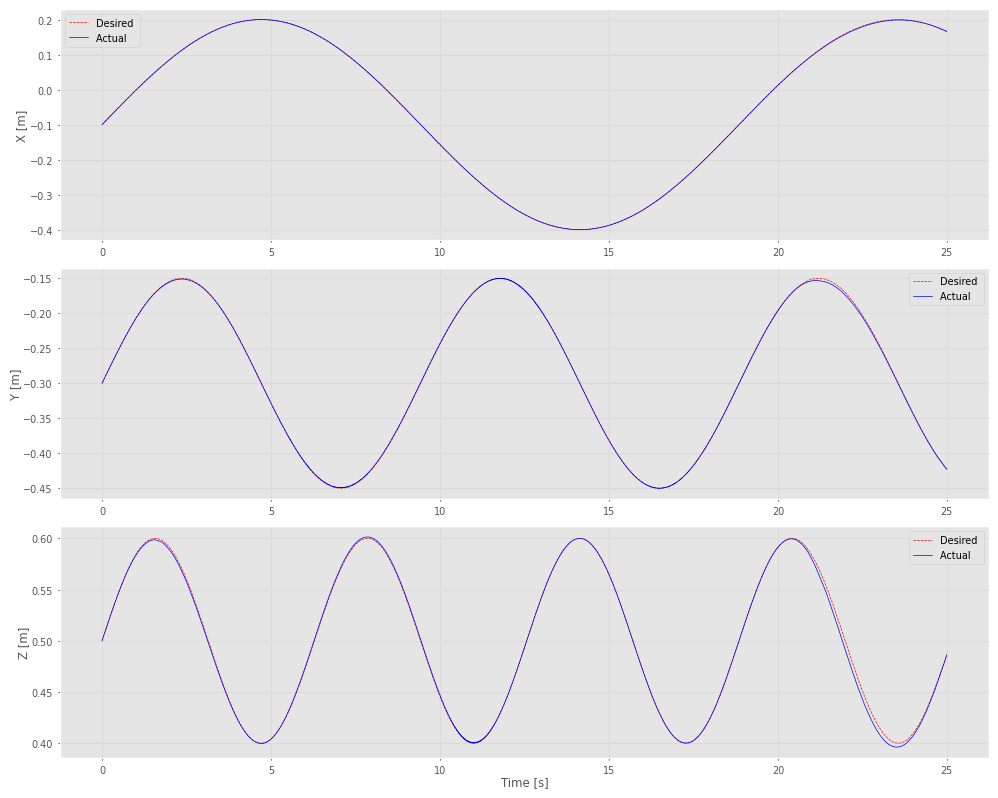

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


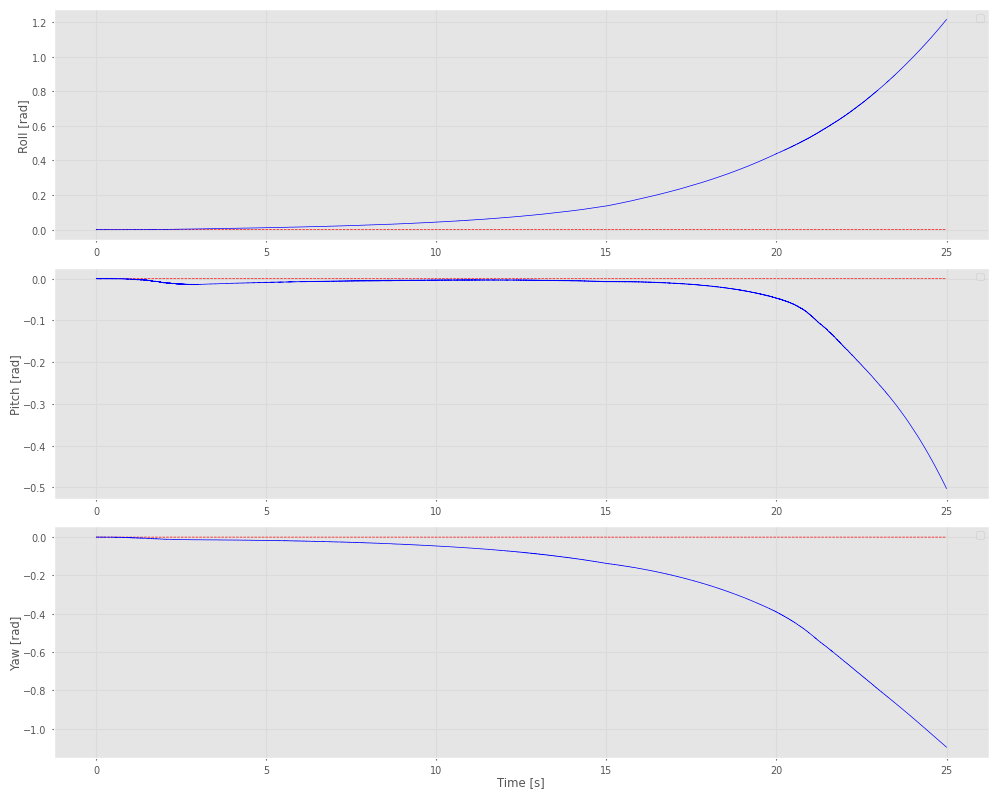

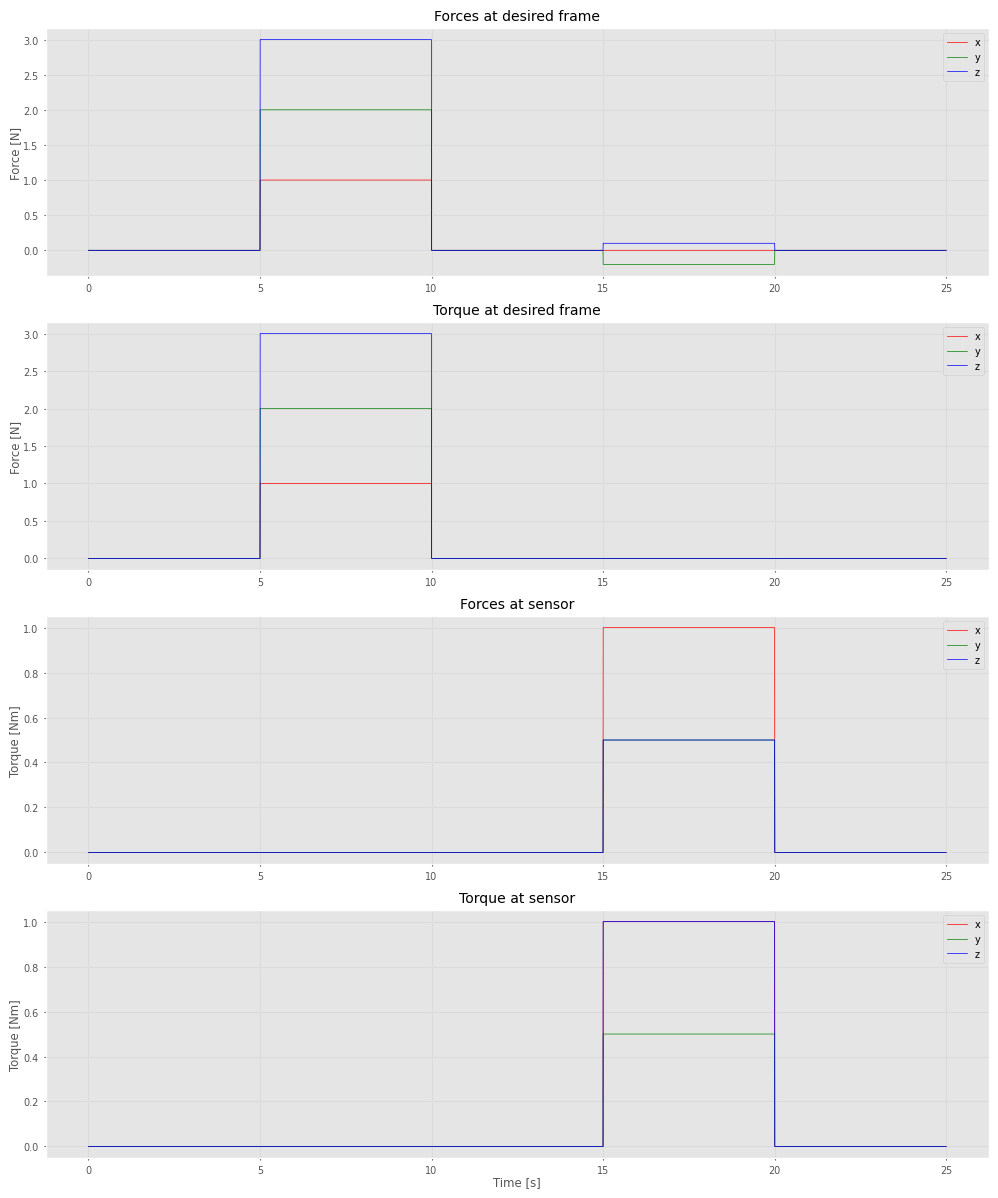

In [ ]:

# ------------------------------------------------------------------
# Plotting Results
# ------------------------------------------------------------------
# Convert time log to numpy array.
time_log = np.array(time_log)


fig, axs = plt.subplots(3, 1, figsize=(10, 8))
trans_labels = ['X', 'Y', 'Z']
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), i], 'r--', label='Desired ')
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), i], 'b-', label='Actual ')
    axs[i].set_ylabel(trans_labels[i] + ' [m]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
#fig.suptitle('Cartesian Translation Motion (Desired vs Actual)')
plt.tight_layout()
plt.show()


# Plot Torques (rotational components
rot_labels = ['Roll', 'Pitch', 'Yaw']
#f_all, mu_d_all, f_all_sensor, mu_d_all_sensor
# Plot Orientation (RPY) Desired vs Actual
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), 3+i], 'r--')
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), 3+i], 'b-')
    axs[i].set_ylabel(rot_labels[i] + ' [rad]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
#fig.suptitle('Orientation (RPY) - Desired vs Actual')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# 1) Forces at desired frame (f_all)
axs[0].plot(time_log, f_all[:, 0], 'r', label='x')
axs[0].plot(time_log, f_all[:, 1], 'g', label='y')
axs[0].plot(time_log, f_all[:, 2], 'b', label='z')
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylabel('Force [N]')
axs[0].set_title('Forces at desired frame')

# 2) Torque at desired frame (mu_all)
axs[2].plot(time_log, mu_all[:, 0], 'r', label='x')
axs[2].plot(time_log, mu_all[:, 1], 'g', label='y')
axs[2].plot(time_log, mu_all[:, 1], 'b', label='z')
axs[2].legend()
axs[2].grid(True)
axs[2].set_ylabel('Torque [Nm]')
axs[1].set_title('Torque at desired frame')

# 3) Forces at sensor (f_all_sensor)
axs[1].plot(time_log, f_all_sensor[:, 0], 'r', label='x')
axs[1].plot(time_log, f_all_sensor[:, 1], 'g', label='y')
axs[1].plot(time_log, f_all_sensor[:, 2], 'b', label='z')
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylabel('Force [N]')
axs[2].set_title('Forces at sensor')

# 4) Torque at sensor (mu_all_sensor)
axs[3].plot(time_log, mu_all_sensor[:, 0], 'r', label='x')
axs[3].plot(time_log, mu_all_sensor[:, 1], 'g', label='y')
axs[3].plot(time_log, mu_all_sensor[:, 2], 'b', label='z')
axs[3].legend()
axs[3].grid(True)
axs[3].set_ylabel('Torque [Nm]')
axs[3].set_xlabel('Time [s]')
axs[3].set_title('Torque at sensor')

plt.tight_layout()
plt.show()



# Impedance

In [199]:
import numpy as np
import mujoco
from tqdm import tqdm

# -------------------------------
# Impedance Control Parameters
# -------------------------------

STIFFNESS = np.array([5000, 5000, 5000, 20, 20, 20])
DAMPING_RATIO = 7  # 1 = Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
DAMPING[1] *= 2.5
#DAMPING = np.array([1000, 1000, 1500, 200, 200, 200])
print(DAMPING)
duration = 10
ur5e.m.opt.timestep = 0.002 
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
print("Stepsize:", stepsize)
print("Number of steps:", n_steps)
frames = []
framerate = 30   # Hz
time_log = []
wrench_log        = np.zeros((n_steps,6))
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy  = np.zeros((n_steps, 6))
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))  
torques           = np.zeros((n_steps, 6))
tau_before        = np.zeros((n_steps, 6))
tau_after         = np.zeros((n_steps, 6))
target_positions  = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
time_vals         = np.zeros(n_steps)

# -------------------------------
# Desired Cartesian Trajectory
# -------------------------------

p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))
for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation (in meters)
    x_des = 0.3 * np.sin(t/3) - 0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3) - 0.3
    z_des = 0.1 * np.sin(t) + 0.5
    des_trans = np.array([x_des, y_des, z_des])
    des_orient = np.zeros(3)  # fixed orientation (zero roll, pitch, yaw)
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute desired velocity and acceleration (translation only)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    dp_des[i, :] = np.concatenate(([dx_des, dy_des, dz_des], np.zeros(3)))
    ddp_des[i, :] = np.concatenate(([ddx_des, ddy_des, ddz_des], np.zeros(3)))

def get_external_wrench(t):
    # Returns a 6D wrench [f_x, f_y, f_z, mu_x, mu_y, mu_z]
    if t <= 4:
        return np.zeros(6)
    elif t <= 8:
        return np.array([10, 20, 30, 0, 0, 0])
    elif t <= 10:
        return np.zeros(6)
    #elif t <= 20:
        #return np.array([0, 0, 0, 1, 0.5, 1])
        #return np.zeros(6)
    #elif t <= 25:
        #return np.zeros(6)
    else:
        return np.zeros(6)
# -------------------------------
# Reset and Initialize Simulation
# -------------------------------
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  
mujoco.mj_forward(ur5e.m, ur5e.d)

# -------------------------------
# Main Simulation Loop (Impedance Controller)
# -------------------------------
progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    t_current = ur5e.d.time
    
    # 1. Get current Cartesian state from forward kinematics
    tcp_pos = ur5e.fkine(ur5e.d.qpos)   # tcp_pos.t: position, tcp_pos.rpy(order='xyz'): orientation
    J = ur5e.jacob0(ur5e.d.qpos)        # Cartesian Jacobian (6 x nv)
    v_act = J @ ur5e.d.qvel             # Actual Cartesian velocity
    
    # 2. Compute current Cartesian pose (6D) from tcp_pos
    p_act = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    
    # 3. Compute tracking errors (desired minus actual)
    error = p_des[idx] - p_act          # Position & orientation error
    error_dot = dp_des[idx] - v_act 
    #print("Position error:", error, "Velocity error:", error_dot, "Stiffness", STIFFNESS, "Damping", DAMPING)
    # 4. Compute desired wrench from impedance law (feedforward ddp can be added if desired)
    # Here: wrench = K_imp * error + D_imp * error_dot
    wrench = STIFFNESS * error + DAMPING * error_dot #+ get_external_wrench(t_current)
    wrench_log[idx] = wrench
    #print("Wrench:", wrench)
    # (Optionally add feedforward: + M_imp*ddp_des[idx] )
    #nv = ur5e.m.nv  
    #M_joint = np.zeros((nv, nv))
    #mujoco.mj_fullM(ur5e.m, M_joint, ur5e.d.qM) # feedforward
    #M_cart = np.linalg.pinv(J @ np.linalg.pinv(M_joint) @ J.T)
    #wrench += M_cart @ ddp_des[idx]
    # 5. Map the Cartesian wrench to joint torques via the Jacobian transpose
    tau = J.T @ wrench
    tau_before[idx] = tau
    
    # 6. Add dynamic compensation (mass matrix and coriolis forces)
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces #+ ur5e.d.qvel * VISCOUS + sign(ur5e.d.qvel) * COULOMB
    tau_after[idx] = tau
    # 7. Apply the computed torques
    ur5e.d.ctrl[:] = tau
    
    # 8. Log data
    target_positions[idx] = p_des[idx]
    target_velocities[idx] = dp_des[idx]
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_act
    forces[idx] = wrench  # the computed 6D wrench
    torques[idx] = tau
    time_log.append(t_current)

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # 9. Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# (Optional: video capture and further logging can be added)
if showVideo:
    media.show_video(frames, fps=framerate)

[ 989.94949366 2474.87373415  989.94949366   62.60990337   62.60990337
   62.60990337]
Stepsize: 0.002
Number of steps: 5000


100%|██████████| 10.000000000000009/10 [00:06<00:00,  1.45it/s] 


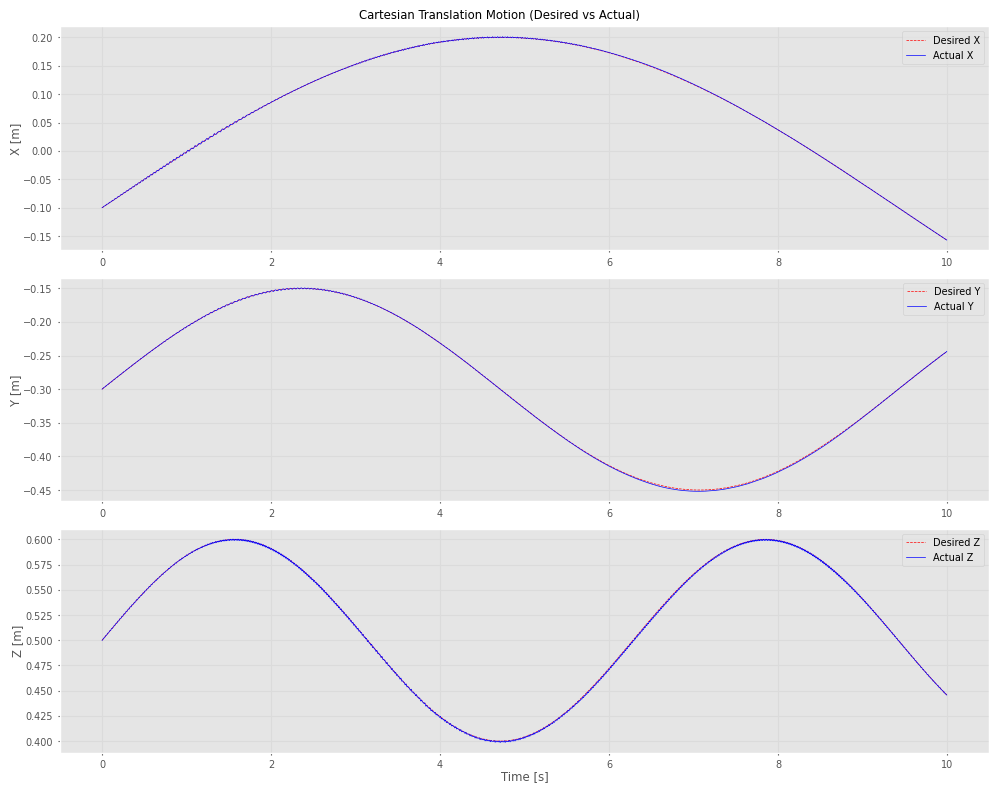

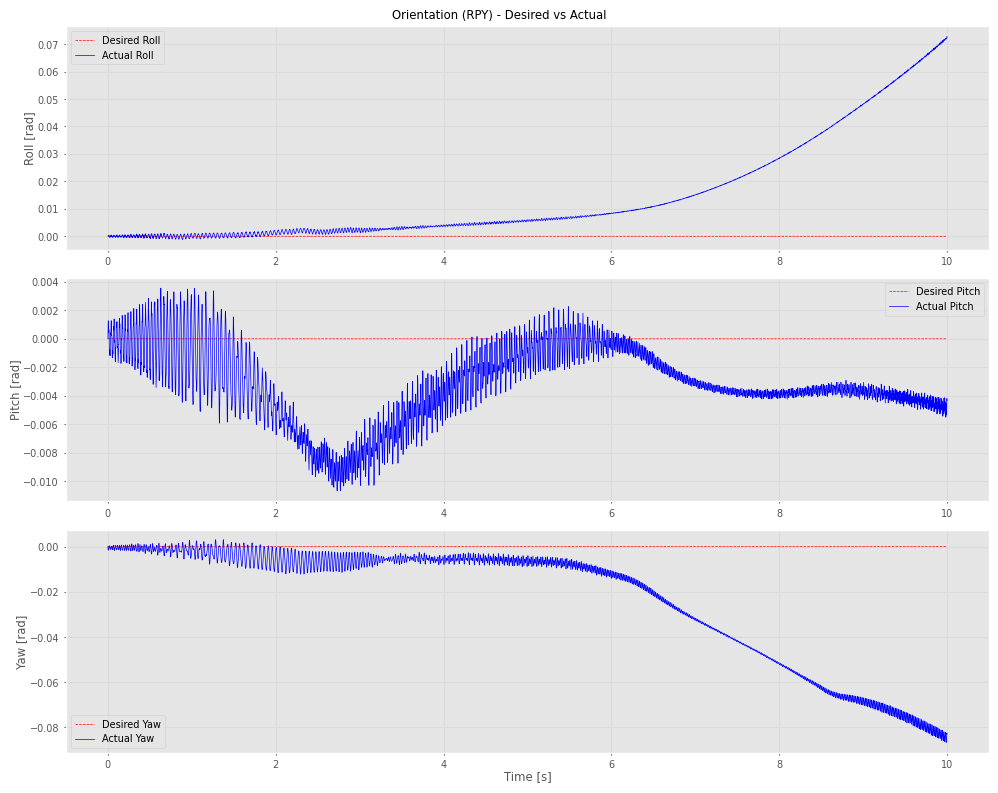

<Figure size 640x480 with 0 Axes>

In [136]:

# ------------------------------------------------------------------
# Plotting Results
# ------------------------------------------------------------------
# Convert time log to numpy array.
time_log = np.array(time_log)


fig, axs = plt.subplots(3, 1, figsize=(10, 8))
trans_labels = ['X', 'Y', 'Z']
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), i], 'r--', label='Desired ' + trans_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), i], 'b-', label='Actual ' + trans_labels[i])
    axs[i].set_ylabel(trans_labels[i] + ' [m]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Cartesian Translation Motion (Desired vs Actual)')
plt.tight_layout()
plt.show()


# Plot Torques (rotational components
rot_labels = ['Roll', 'Pitch', 'Yaw']
#f_all, mu_d_all, f_all_sensor, mu_d_all_sensor
# Plot Orientation (RPY) Desired vs Actual
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), 3+i], 'r--', label='Desired ' + rot_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), 3+i], 'b-', label='Actual ' + rot_labels[i])
    axs[i].set_ylabel(rot_labels[i] + ' [rad]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Orientation (RPY) - Desired vs Actual')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



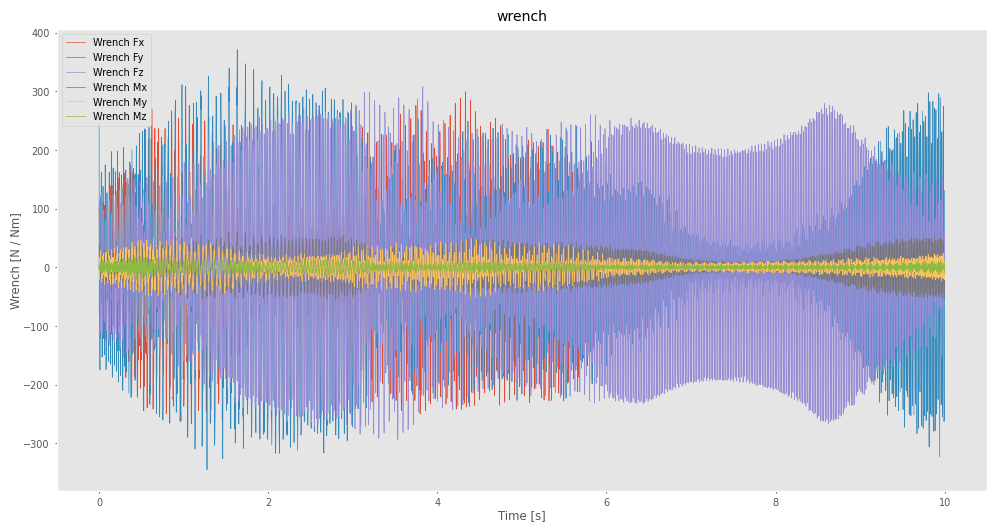

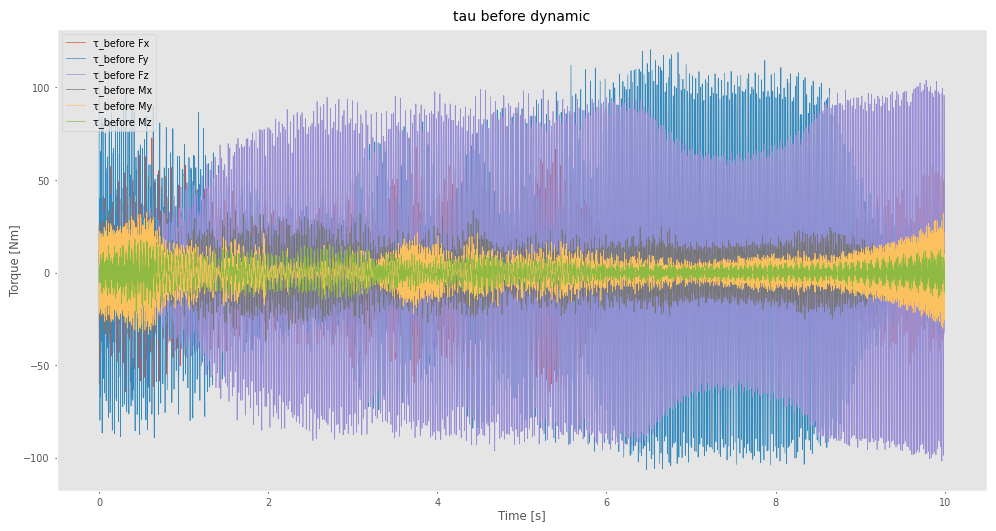

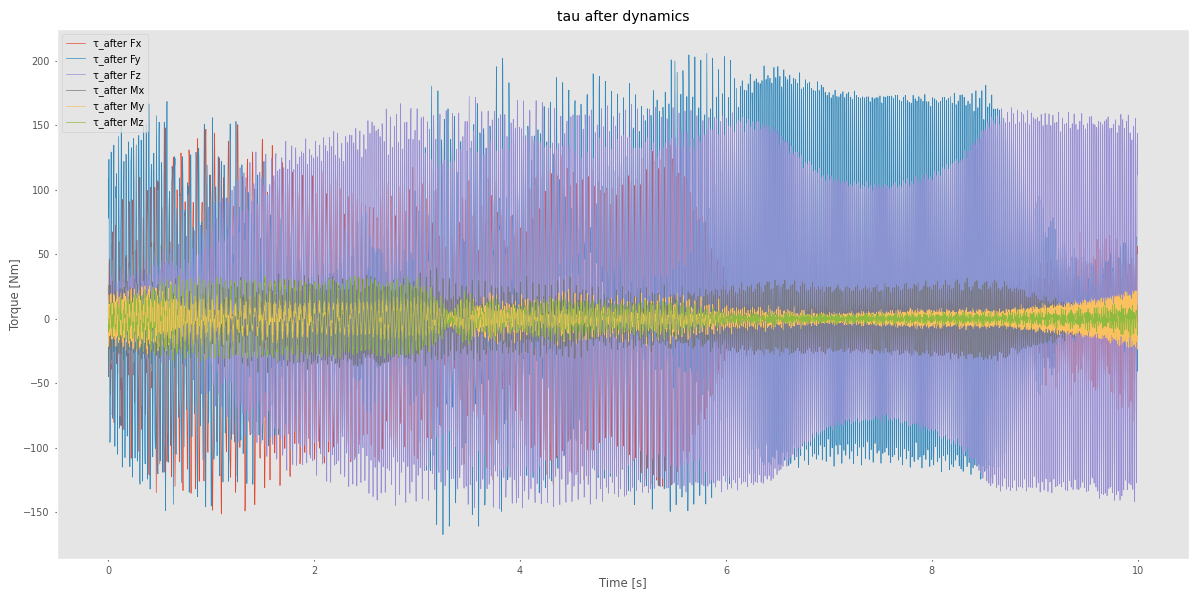

In [205]:
labels = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']

# Plot wrench (Cartesian force/torque)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(time_log, wrench_log[:, i], label=f"Wrench {labels[i]}")
plt.title("wrench")
plt.xlabel("Time [s]")
plt.ylabel("Wrench [N / Nm]")
plt.legend()
plt.grid()

# Plot tau_before (torques before energy tank modulation)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(time_log, tau_before[:, i], label=f"τ_before {labels[i]}")
plt.title("tau before dynamic")
plt.xlabel("Time [s]")
plt.ylabel("Torque [Nm]")
plt.legend()
plt.grid()

# Plot tau_after (torques after energy tank modulation)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(time_log, tau_after[:, i], label=f"τ_after {labels[i]}")
plt.title("tau after dynamics")
plt.xlabel("Time [s]")
plt.ylabel("Torque [Nm]")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


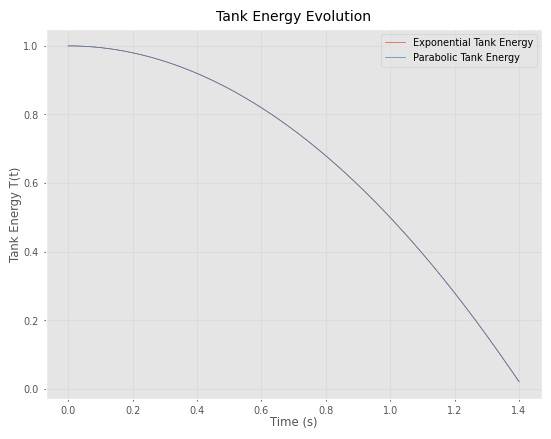

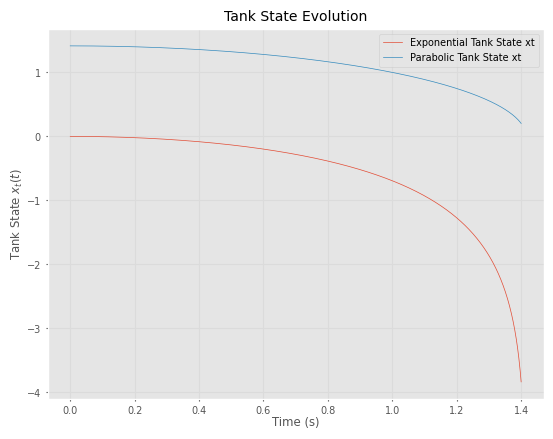

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m = 1.0
F_bar = 1.0
dt = 0.001
t_max = np.sqrt(2 * m / F_bar) * 0.99  # just before blow-up
time = np.arange(0, t_max, dt)

# Velocity and kinetic energy (same for both)
v = F_bar * time / m
H = 0.5 * m * v**2

# Exponential Tank: T(xt) = exp(xt), xt(0) = 0 => T(0) = 1
xt_exp = [0.0]
for i in range(1, len(time)):
    xt_dot = -F_bar**2 * time[i] / (m * np.exp(xt_exp[-1]))
    xt_exp.append(xt_exp[-1] + xt_dot * dt)
xt_exp = np.array(xt_exp)
T_exp = np.exp(xt_exp)

# Parabolic Tank: T(xt) = 0.5 * xt^2, xt(0) = sqrt(2) => T(0) = 1
xt_par = [np.sqrt(2)]
for i in range(1, len(time)):
    xt_dot = -F_bar**2 * time[i] / (m * xt_par[-1])  # dxt/dt = -F*v / xt
    xt_par.append(xt_par[-1] + xt_dot * dt)
xt_par = np.array(xt_par)
T_par = 0.5 * xt_par**2

# Plot Tank Energy
plt.figure()
plt.plot(time, T_exp, label='Exponential Tank Energy')
plt.plot(time, T_par, label='Parabolic Tank Energy')
plt.xlabel('Time (s)')
plt.ylabel('Tank Energy T(t)')
plt.title('Tank Energy Evolution')
plt.legend()
plt.grid(True)

# Plot Tank States
plt.figure()
plt.plot(time, xt_exp, label='Exponential Tank State xt')
plt.plot(time, xt_par, label='Parabolic Tank State xt')
plt.xlabel('Time (s)')
plt.ylabel('Tank State $x_t(t)$')
plt.title('Tank State Evolution')
plt.legend()
plt.grid(True)

plt.show()


# Energy tank

In [687]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from spatialmath import SO3
from cvxopt import matrix, solvers
from spatialmath.base import trlog

def skew_symmetric(mat):
    return 0.5 * (mat - mat.T)

def adjoint_transform(H):
    R = H[:3, :3]
    p = H[:3, 3]
    p_hat = np.array([[0, -p[2], p[1]],
                      [p[2], 0, -p[0]],
                      [-p[1], p[0], 0]])
    upper = np.hstack((R, np.zeros((3, 3))))
    lower = np.hstack((p_hat @ R, R))
    return np.vstack((upper, lower))

def vee(S):
    return np.array([
        S[1, 0],
        S[0, 2],
        S[2, 1]
    ])


solvers.options['show_progress'] = False
class EnergyTankCBF:
    def __init__(self, kf=10.0, p1=5.0, p2=3.0, Pmax=30.0, Emin=0.5, E0=5.0, Emax=100.0):
        self.kf = kf
        self.p1 = p1
        self.p2 = p2
        self.Pmax = Pmax
        self.Emin = Emin
        self.E = E0
        self.E0 = E0
        self.Emax = Emax
        self.alpha_prev = 0.0

    def solve(self, Pd, dt):
        Pd_bar = -Pd
        Pmax_bar = -self.Pmax
        s = self.E

        # Setup QP
        P = matrix(np.array([[2.0]]))
        q = matrix(np.array([-2.0 * Pd_bar]))

        # Estimate s_dot for constraint shaping
        s_dot_guess = -Pd_bar
        s_dot_guess = np.clip(s_dot_guess, -self.Pmax * 2, self.Pmax * 2)

        epsilon = 1e-6
        h = matrix(np.array([
            -self.p1 * (s_dot_guess - Pmax_bar) + self.kf * s_dot_guess + epsilon,
            -(-2 * self.p2 + self.kf) * s_dot_guess + self.p2**2 * (s - self.Emin) + epsilon
        ]))

        G = matrix(np.array([
            [-self.kf],
            [-self.kf]
        ]))

        try:
            sol = solvers.qp(P, q, G, h)
            u = float(sol['x'][0])
        except:
            print(f"⚠️ QP failed — setting u = 0 | Pd: {Pd:.4f}, s: {s:.4f}")
            u = 0.0

        # Update energy tank
        if Pd < 0:
            self.E += -Pd * dt  # Recharge
        else:
            delta_E = u * dt
            if self.E - delta_E < self.Emin:
                delta_E = self.E - self.Emin
                u = delta_E / dt
            self.E -= delta_E

        self.E = np.clip(self.E, self.Emin, self.Emax)

        # Compute alpha
        alpha = -u / Pd if abs(Pd) > 1e-6 else 0.0
        alpha = 0.9 * self.alpha_prev + 0.1 * alpha
        alpha = np.clip(alpha, 0.0, 1.2)
        self.alpha_prev = alpha

        return alpha, u, self.E
MAX_TORQUE = np.array([2.0, 15.0, 15.0, 3.0, 2.0, 2.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint
duration = 20  # seconds, for the impedance demonstration
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
frames = []
framerate = 30   # Hz
time_log = []
# Preallocate logging arrays (6D: [x,y,z, roll,pitch,yaw])
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy  = np.zeros((n_steps, 6))
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))  # computed wrench
torques           = np.zeros((n_steps, 6))
target_positions  = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
time_vals         = np.zeros(n_steps)
# Logging
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  
fd_log = np.zeros((n_steps, 6))
energy_log         = np.zeros(n_steps)
alpha_log          = np.zeros(n_steps)
Ea_ns_log = np.zeros(n_steps)       # virtual tank energy if no scaling
Pa_ns_log = np.zeros(n_steps)       # power with no scaling (full control)
Pa_ws_log = np.zeros(n_steps)       # power with scaling (actual)
s_dot_log = np.zeros(n_steps)       # energy rate

p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))
for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation (in meters)
    x_des = 0.3 * np.sin(t/3) - 0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3) - 0.3
    z_des = 0.1 * np.sin(t) + 0.5
    des_trans = np.array([x_des, y_des, z_des])
    des_orient = np.zeros(3)  # fixed orientation (zero roll, pitch, yaw)
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute desired velocity and acceleration (translation only)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    dp_des[i, :] = np.concatenate(([dx_des, dy_des, dz_des], np.zeros(3)))
    ddp_des[i, :] = np.concatenate(([ddx_des, ddy_des, ddz_des], np.zeros(3)))
'''
for i in range(n_steps):
    t = i * stepsize
    
    # Fixed position
    des_trans = np.array([-0.1, -0.3, 0.5])
    
    # Fixed orientation (in radians)
    des_orient = np.array([0.0, 0.0, 0.0])
    
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Zero velocity and acceleration
    dp_des[i, :] = np.zeros(6)
    ddp_des[i, :] = np.zeros(6)
'''

def get_external_wrench(t):
    # Returns a 6D wrench [f_x, f_y, f_z, mu_x, mu_y, mu_z]
    if t <= 4:
        return np.zeros(6)
    elif t <= 8:
        return np.array([0, 0, -10, 0, 0, 0])
    elif t <= 10:
        return np.zeros(6)
    #elif t <= 20:
        #return np.array([0, 0, 0, 1, 0.5, 1])
        #return np.zeros(6)
    #elif t <= 25:
        #return np.zeros(6)
    else:
        return np.zeros(6)

# Tank instantiation
#STIFFNESS = np.array([5000, 5000, 5000, 20, 20, 20])
#DAMPING = np.array([1000, 1000, 1000, 200, 200, 200])
#STIFFNESS = np.array([5000, 5000, 5000, 20, 20, 20])
#DAMPING_RATIO = 7  # 1 = Critical damping
#DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
#DAMPING[1] *= 2.5
#kc0 = 5000
#Emax = 100.0
#mass_eff = 3.0
#kc_log = np.zeros(n_steps)
#tank = EnergyTankCBF(kf=50.0, p1=2.0, p2=1.0, Pmax=15.0, Emin=90.0, E0=100.0, Emax=100.0)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  # Using your IK solution (sol.q) for initial configuration
mujoco.mj_forward(ur5e.m, ur5e.d)

# ET LOG #
position_error_log = np.zeros((n_steps, 3))
orientation_error_log = np.zeros((n_steps, 3))
velocity_error_log = np.zeros((n_steps, 6))
wrench_log2 = np.zeros((n_steps, 6))
wrench_log_damped = np.zeros((n_steps, 6))
trajectory_log_actual = np.zeros((n_steps, 3))
trajectory_log_desired = np.zeros((n_steps, 3))
tau_nominal_log           = np.zeros((n_steps, 6))
wt_log                  = np.zeros((n_steps, 6))
wt2_log                = np.zeros((n_steps, 6))
Hvt_log = np.zeros((n_steps, 6))
delta_T_log = np.zeros((n_steps, 6))
Etot_log = np.zeros(n_steps)
Tkin_log = np.zeros(n_steps)
Vpot_log = np.zeros(n_steps)
lambda_log = np.zeros(n_steps)
Pc_log = np.zeros(n_steps)
Pcg_log = np.zeros(n_steps)
PcTot_log = np.zeros(n_steps)
beta_log = np.zeros(n_steps)

# -------------------------------
# Main Simulation Loop (Impedance Controller)
# -------------------------------
progress_bar = tqdm(total=duration)
idx = 0

####### Energy tank #######
Kt = np.eye(3) * 19500    # translational stiffness - 19500 for Wt2
Ko = np.eye(3) * 4   # rotational stiffness
Kc = np.zeros((3, 3))    # no coupling
K_full_to = np.block([[Kt, Kc],
                   [Kc.T, Ko]])
#K_full_ot = np.block([[Ko, Kc],[Kc.T, Kt]])
Go = 0.5 * (np.trace(Ko)) * np.eye(3) - Ko
Gt = 0.5 * (np.trace(Kt)) * np.eye(3) - Kt
Gc = 0.5 * (np.trace(Kc)) * np.eye(3) - Kc
#B = np.eye(6) * 1000.0  # B̄ = 50 * I_6
Bt = np.eye(3) * 50
Bo = np.eye(3) * 50
B_to = np.block([[Bt, Kc],[Kc.T, Bo]])
#B_ot = np.block([[Bo, Kc],[Kc.T, Bt]])
Emax = 6.0
Pmax = 2.0
lambda_s = 1.0
beta_s = 1.0
Kt_new = Kt
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    t = ur5e.d.time
    if t >= 12.5:
        Emax = 4.5
    #else:
    #    Emax = 5
    f_ext = get_external_wrench(t)
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    v_act = J @ ur5e.d.qvel
    p_act = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    
    position_error = p_des[idx] - p_act          # Position & orientation error
    position_error_log[idx] = position_error[:3]
    orientation_error_log[idx] = position_error[3:]
    velocity_error = dp_des[idx] - v_act
    velocity_error_log[idx] = velocity_error
    position_error_norm_sq = np.dot(position_error, position_error)
    velocity_norm_sq = np.dot(velocity_error, velocity_error)
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)

    STIFFNESS_adaptive = STIFFNESS#np.array([kc]*3 + [kc*0.05]*3)
    DAMPING_adaptive = DAMPING#2 * np.sqrt(STIFFNESS_adaptive)

    #if tank.E <= tank.Emin + 1.0: # Velocity scaling near tank depletion
    #    v_e *= 0.5

    #wrench = STIFFNESS_adaptive * position_error + DAMPING_adaptive * velocity_error# + f_ext

    #tau_nominal = J.T @ wrench
    #### ET ####
    H0t = ur5e.fkine(ur5e.d.qpos).A
    Hv0 = sm.SE3.RPY(p_des[idx, 3:], order='xyz') * sm.SE3(p_des[idx, :3]) 
    Hv0 = Hv0.A  # Convert to matrix
    Hvt = np.linalg.inv(Hv0) @ H0t
    Rvt = -Hvt[:3, :3]
    delta_theta = vee(skew_symmetric(Rvt))
    pvt = -Hvt[:3, 3]
    delta_p = pvt
    delta_T_hvt = np.concatenate((delta_p, delta_theta))
    Hvt_log[idx] = delta_T_hvt

    pvt_col = pvt.reshape((3, 1))
    mt1 = vee(skew_symmetric(Go @ Rvt))
    mt2 = vee(skew_symmetric(Gt @ Rvt @ pvt_col @ pvt_col.T @ Rvt))
    mt = -2 * mt1 - mt2# - 2 * mt3  # shape: (3,)

    ft1 = Rvt.T @ vee(skew_symmetric(Gt @ pvt_col)) @ Rvt
    ft2 = vee(skew_symmetric(Gt @ Rvt @ pvt_col @ pvt_col.T @ Rvt))
    ft3 = vee(skew_symmetric(Gc @ Rvt))
    #ft = -ft1 - ft2# - 2 * ft3  # shape: (3,)
    
    ft = Kt_new @ delta_p
    Wt = np.concatenate((ft, -mt))  # [force, moment]
    wt_log[idx] = Wt

    Tkin = 0.5 * ur5e.d.qvel.T @ mass_matrix @ ur5e.d.qvel
    Tkin_log[idx] = Tkin
    Vt = -0.25*np.trace(pvt_col.T @ Gt @ pvt_col) - 0.25 * np.trace(pvt_col.T @ Rvt @ Gt @ Rvt @ pvt_col)
    Vo = -np.trace(Go @ Rvt)
    Vc = np.trace(Gc @ Rvt @ pvt_col)
    Vpot = Vt + Vo + Vc
    Vpot_log[idx] = Vpot
    Etot = Tkin + Vpot
    Etot_log[idx] = Etot
    if Etot <= Emax:
        lambda_s = 1.0
    else:
        lambda_s = (Emax - Tkin) / (Vpot)
        
    Go *= lambda_s
    Gt *= lambda_s
    Gc *= lambda_s
    Kt_new *= lambda_s
    lambda_log[idx] = lambda_s
    Etot = Tkin + lambda_s * Vpot

    qvel_backup = ur5e.d.qvel.copy()


    ur5e.d.qvel[:] = 0 # kill coriolis and centrifugal
    mujoco.mj_forward(ur5e.m, ur5e.d)

    # Now qfrc_bias contains only gravity
    gravity = ur5e.d.qfrc_bias.copy()

    # Restore original velocities
    ur5e.d.qvel[:] = qvel_backup
    mujoco.mj_forward(ur5e.m, ur5e.d)

    W0 = adjoint_transform(H0t).T @ (Wt.T + get_external_wrench(t)) 
    Pc = np.dot(J.T @ W0 - B_to @ ur5e.d.qvel, ur5e.d.qvel)
    Pc_log[idx] = Pc
    Pcg = gravity.T @ ur5e.d.qvel
    Pcg_log[idx] = Pcg
    PcTot = Pc + Pcg
    PcTot_log[idx] = PcTot
    if Pc <= Pmax:
        beta_s = 1.0
    else:
        beta_s = ((J.T @ W0).T @ ur5e.d.qvel - Pmax) / (ur5e.d.qvel.T @ B_to @ ur5e.d.qvel)
    beta_log[idx] = beta_s
    Bo *= beta_s
    Bt *= beta_s
    B_to = np.block([[Bt, Kc],[Kc.T, Bo]])

    error = p_des[idx] - p_act          # Position & orientation error
    rotation_error = error[3:]
    position_error = error[:3]
    delta_theta_vt = rotation_error
    delta_p_vt     = position_error  # 3D
    delta_T = np.concatenate((delta_p_vt, delta_theta_vt))  # shape: (6,)            # shape: (6, 6)
    delta_T_log[idx] = delta_T
    Wt2 = K_full_to @ delta_T
    wt2_log[idx] = Wt2
    

    W02 = adjoint_transform(H0t).T @ (Wt2.T + get_external_wrench(t)) 

    W0_damped = W0 - DAMPING @ velocity_error

    wrench_log2[idx] = W0
    wrench_log_damped[idx] = W0_damped
    trajectory_log_actual[idx] = tcp_pos.t
    trajectory_log_desired[idx] = p_des[idx, :3]
    #B = np.diag(DAMPING)
    
    tau_nominal = J.T @ W0.T - B_to @ ur5e.d.qvel.copy() + gravity #ur5e.d.qfrc_bias.copy()
    #tau_nominal += -B @ ur5e.d.qvel.copy() + ur5e.d.qfrc_bias.copy()
    tau_nominal_log[idx] = tau_nominal
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    #tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    #Pd = float(np.dot(tau_nominal, ur5e.d.qvel))
    #alpha, u_opt, energy = tank.solve(Pd, dt=stepsize)
    #Pa_ns_log[idx] = Pd
    #Pa_ws_log[idx] = alpha * Pd
    #s_dot_log[idx] = -u_opt

    #if idx == 0:
    #    Ea_ns_log[idx] = tank.E
    #else:
    #    Ea_ns_log[idx] = Ea_ns_log[idx - 1] - Pd * stepsize

    #F_d = wrench
    #fd_log[idx] = F_d

    #F_a = alpha * F_d
    #tau_safe = J.T @ F_a + mass_matrix @ ur5e.d.qacc + coriolis_forces
    #tau_safe = np.clip(tau_safe, MIN_TORQUE, MAX_TORQUE)

    #energy_log[idx] = tank.E
    #alpha_log[idx] = alpha

    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    #safe_torque_log[idx] = tau_safe

    ur5e.d.ctrl[:] = tau_nominal

    time_vals[idx] = t
    target_positions[idx] = p_des[idx]
    target_velocities[idx] = dp_des[idx]
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_act
    forces[idx] = wrench  # the computed 6D wrench
    torques[idx] = tau

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)

100%|█████████▉| 19.999999999999794/20 [00:23<00:00,  1.19s/it] 


<Figure size 640x480 with 0 Axes>

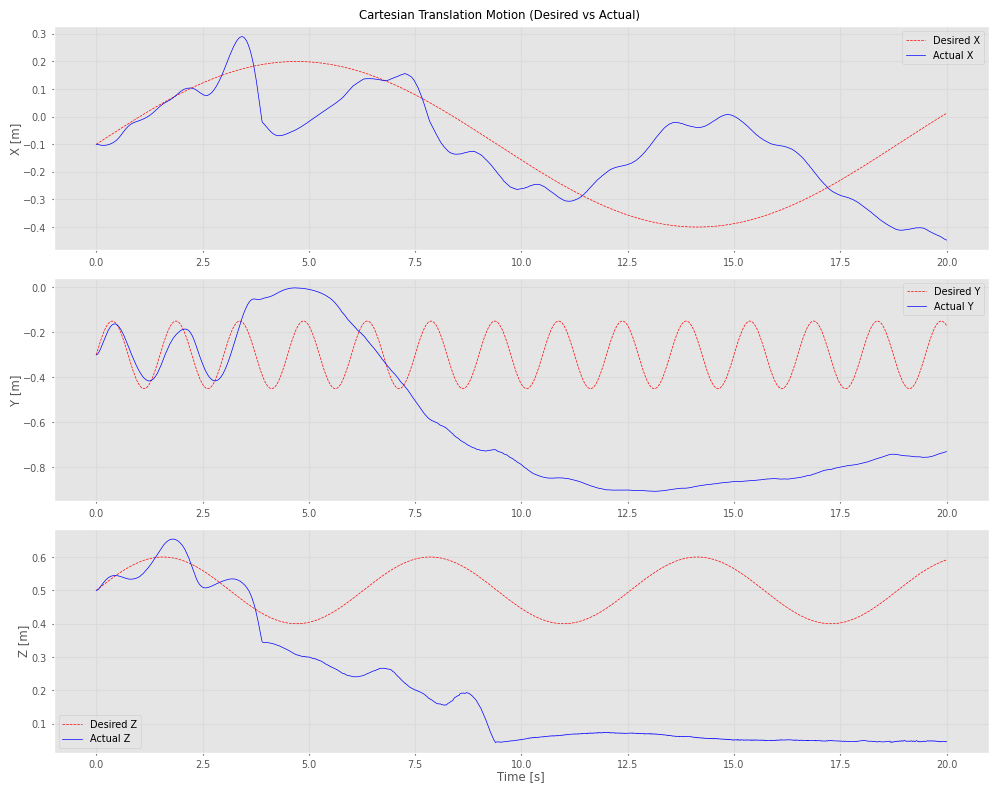

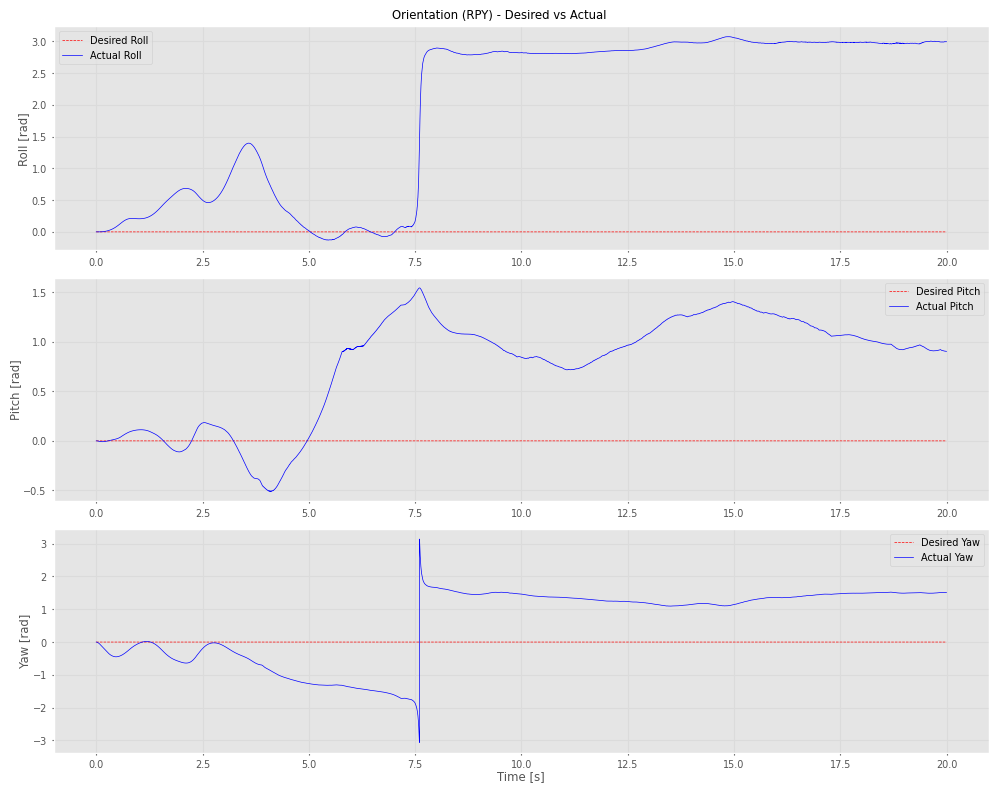

<Figure size 640x480 with 0 Axes>

In [688]:

# ------------------------------------------------------------------
# Plotting Results
# ------------------------------------------------------------------
# Convert time log to numpy array.
time_log = np.array(time_log)


fig, axs = plt.subplots(3, 1, figsize=(10, 8))
trans_labels = ['X', 'Y', 'Z']
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), i], 'r--', label='Desired ' + trans_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), i], 'b-', label='Actual ' + trans_labels[i])
    axs[i].set_ylabel(trans_labels[i] + ' [m]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Cartesian Translation Motion (Desired vs Actual)')
plt.tight_layout()
plt.show()


# Plot Torques (rotational components
rot_labels = ['Roll', 'Pitch', 'Yaw']
#f_all, mu_d_all, f_all_sensor, mu_d_all_sensor
# Plot Orientation (RPY) Desired vs Actual
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), 3+i], 'r--', label='Desired ' + rot_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), 3+i], 'b-', label='Actual ' + rot_labels[i])
    axs[i].set_ylabel(rot_labels[i] + ' [rad]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Orientation (RPY) - Desired vs Actual')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



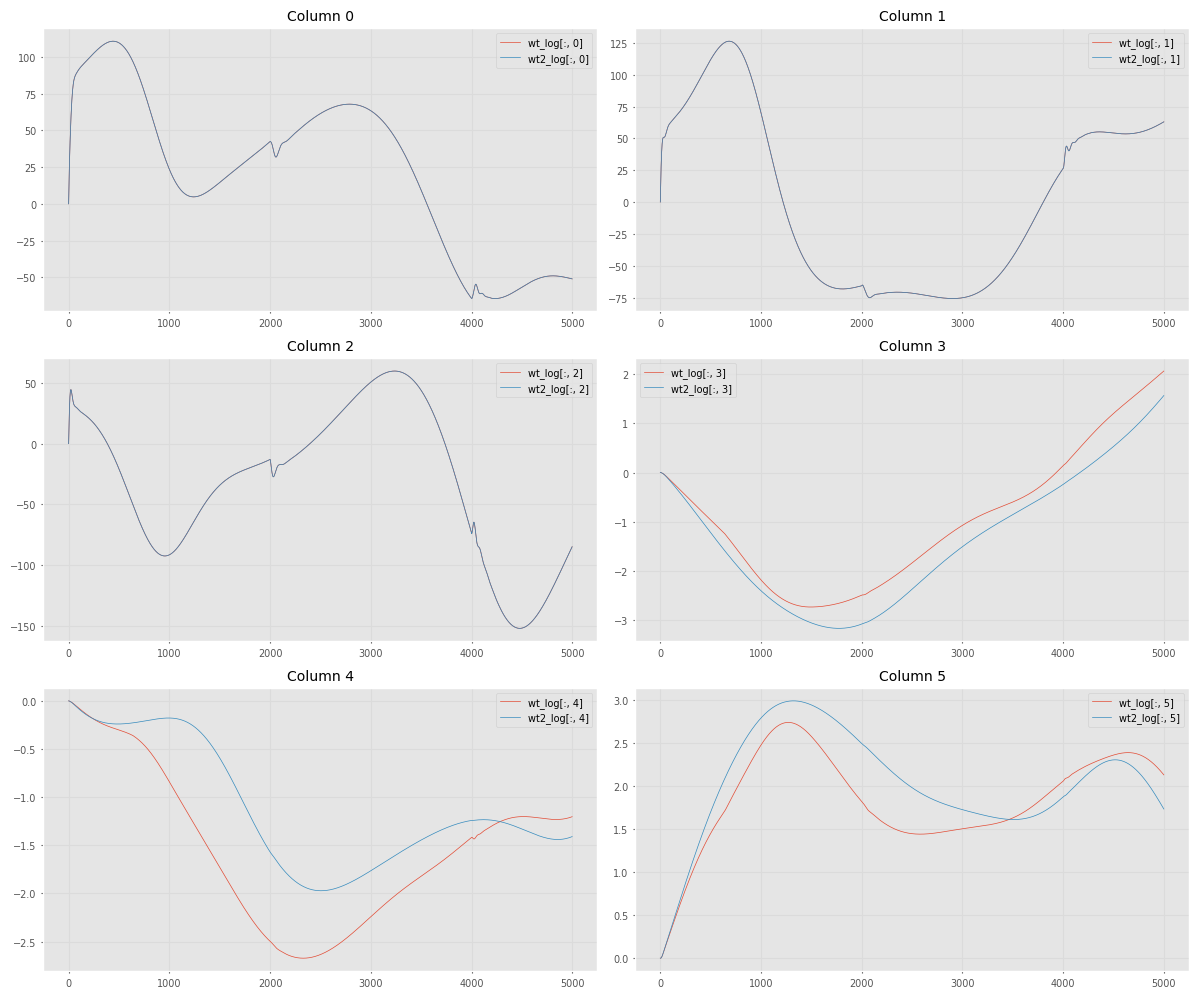

In [646]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    ax.plot(wt_log[:, i], label='wt_log[:, {}]'.format(i))
    ax.plot(wt2_log[:, i], label='wt2_log[:, {}]'.format(i))
    ax.set_title(f'Column {i}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

initial total energy 5.999999999999999


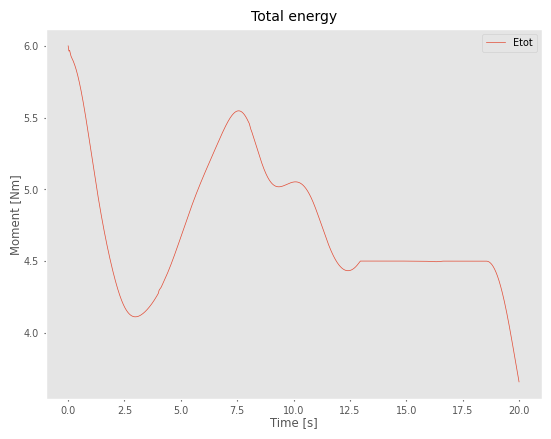

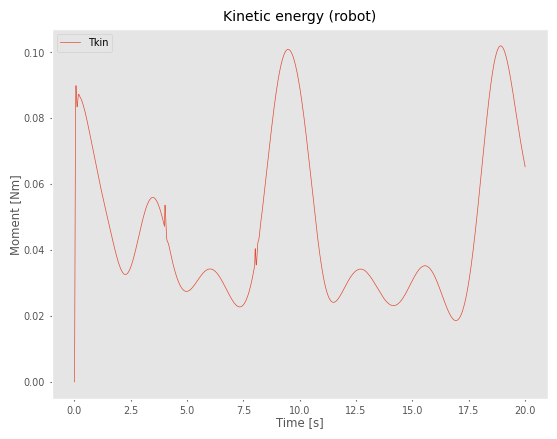

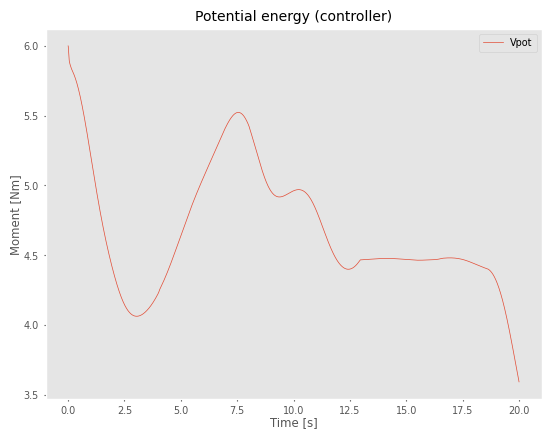

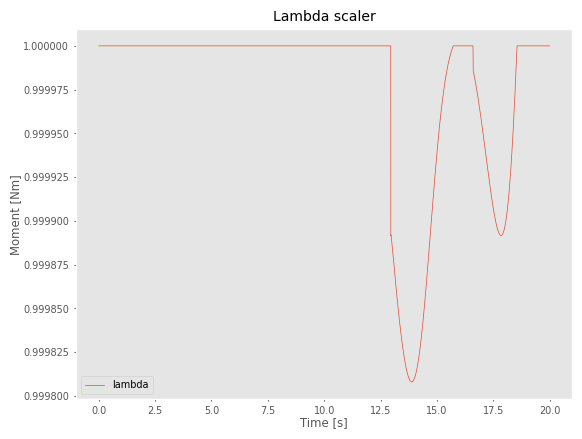

In [686]:
print("initial total energy", Etot_log[0])
plt.figure()
plt.plot(time_log, Etot_log[:], label=f'Etot')
plt.title("Total energy")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
# Plot tau_before (torques before energy tank modulation)
plt.figure()
plt.plot(time_log, Tkin_log[:], label=f'Tkin')
plt.title("Kinetic energy (robot)")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
# Plot tau_before (torques before energy tank modulation)
plt.figure()
plt.plot(time_log, Vpot_log[:], label=f'Vpot')
plt.title("Potential energy (controller)")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
plt.figure()
plt.plot(time_log, lambda_log[:], label=f'lambda')
plt.title("Lambda scaler")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()

initial total energy 0.0


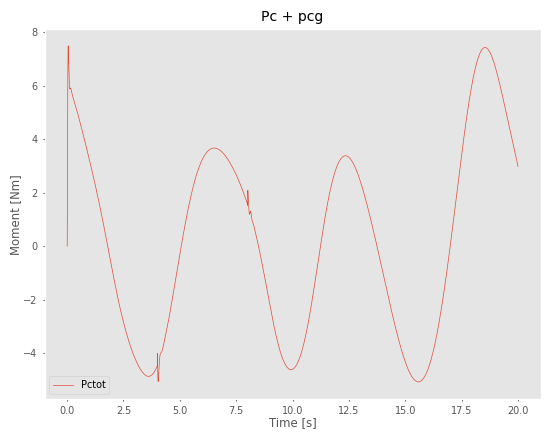

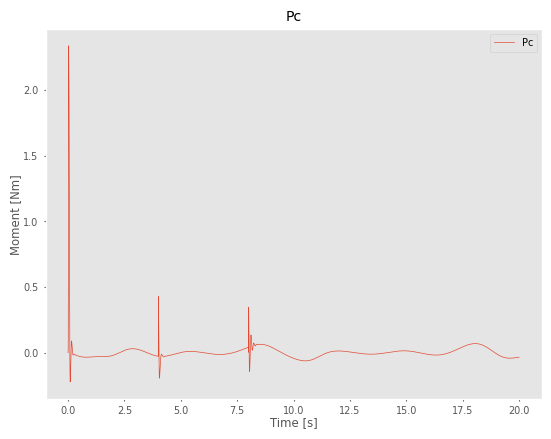

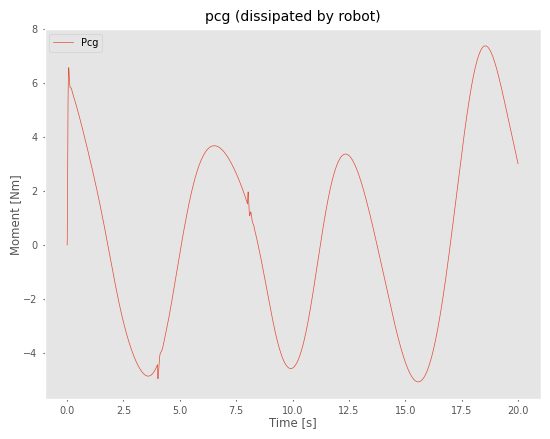

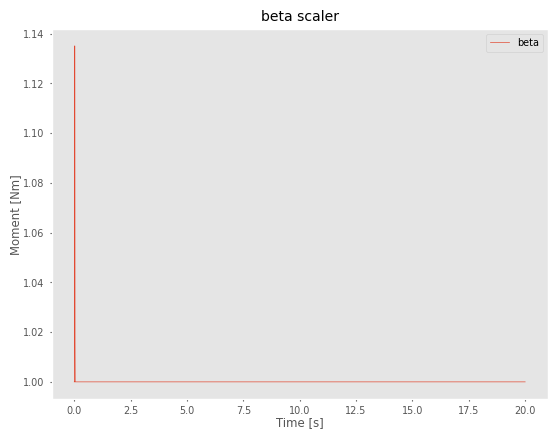

In [666]:
print("initial total energy", PcTot_log[0])
plt.figure()
plt.plot(time_log, PcTot_log[:], label=f'Pctot')
plt.title("Pc + pcg")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
# Plot tau_before (torques before energy tank modulation)
plt.figure()
plt.plot(time_log, Pc_log[:], label=f'Pc')
plt.title("Pc")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
# Plot tau_before (torques before energy tank modulation)
plt.figure()
plt.plot(time_log, Pcg_log[:], label=f'Pcg')
plt.title("pcg (dissipated by robot)")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()
plt.figure()
plt.plot(time_log, beta_log[:], label=f'beta')
plt.title("beta scaler")
plt.xlabel("Time [s]")
plt.ylabel("Moment [Nm]")
plt.legend()
plt.grid()

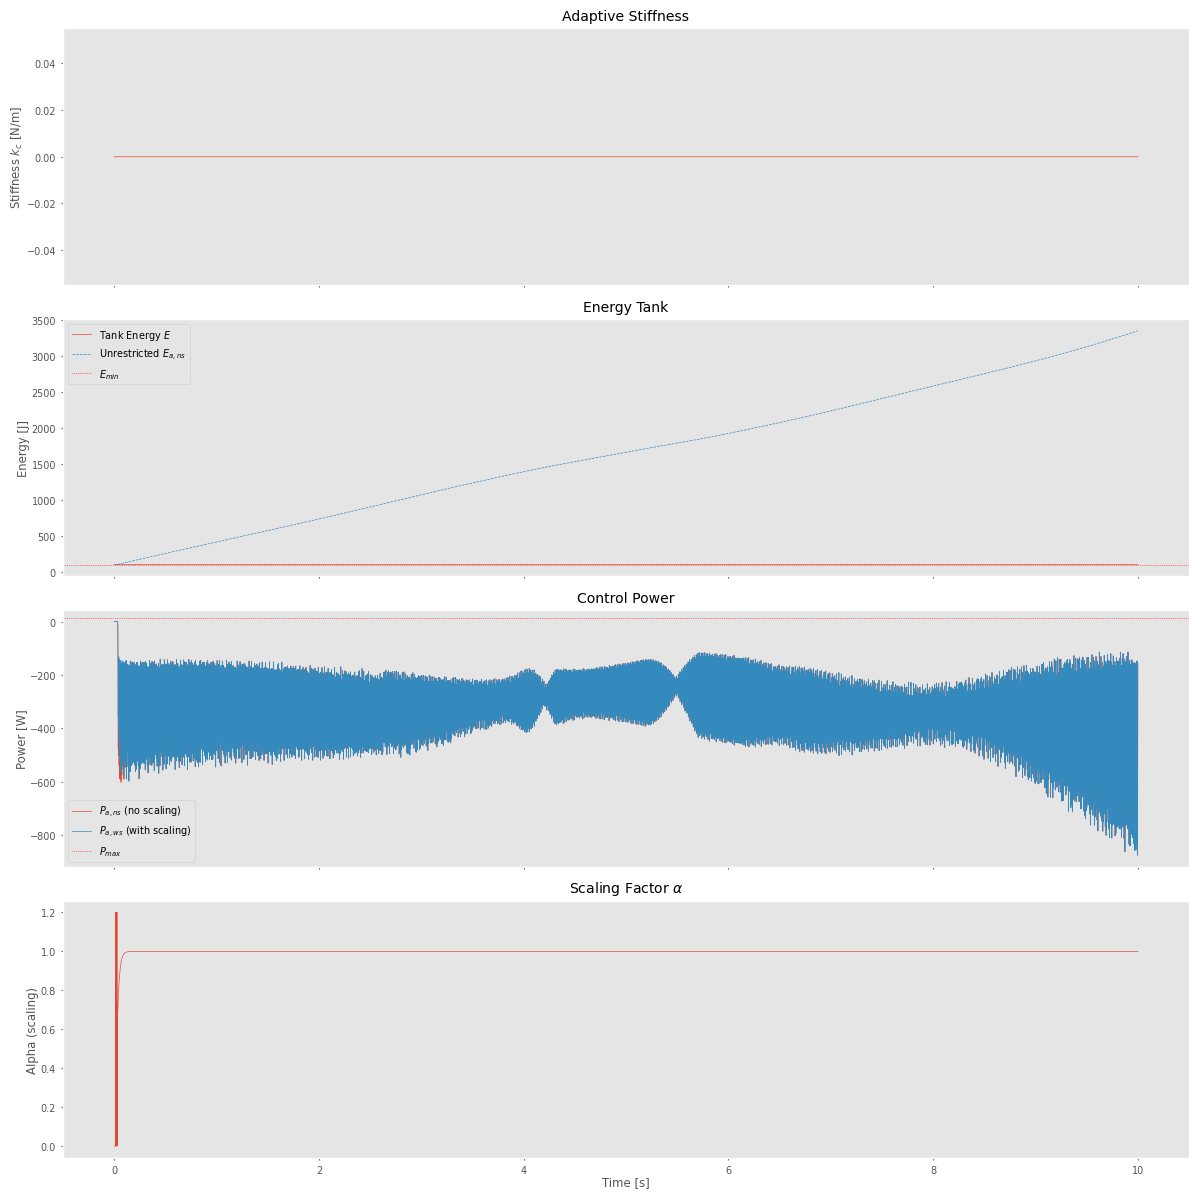

In [188]:
import matplotlib.pyplot as plt

t = np.array(time_vals[:idx])  # match with actual simulation steps

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# --- 1. Adaptive stiffness
axs[0].plot(t, kc_log[:idx])
axs[0].set_ylabel("Stiffness $k_c$ [N/m]")
axs[0].set_title("Adaptive Stiffness")
axs[0].grid()

# --- 2. Energy tank level
axs[1].plot(t, energy_log[:idx], label="Tank Energy $E$")
axs[1].plot(t, Ea_ns_log[:idx], label="Unrestricted $E_{a,ns}$", linestyle='--')
axs[1].axhline(tank.Emin, color='r', linestyle=':', label="$E_{min}$")
axs[1].set_ylabel("Energy [J]")
axs[1].legend()
axs[1].set_title("Energy Tank")
axs[1].grid()

# --- 3. Power (with and without scaling)
axs[2].plot(t, Pa_ns_log[:idx], label="$P_{a,ns}$ (no scaling)")
axs[2].plot(t, Pa_ws_log[:idx], label="$P_{a,ws}$ (with scaling)")
axs[2].axhline(tank.Pmax, color='r', linestyle=':', label="$P_{max}$")
axs[2].set_ylabel("Power [W]")
axs[2].legend()
axs[2].set_title("Control Power")
axs[2].grid()

# --- 4. Alpha scaling
axs[3].plot(t, alpha_log[:idx])
axs[3].set_ylabel("Alpha (scaling)")
axs[3].set_xlabel("Time [s]")
axs[3].set_title("Scaling Factor $\\alpha$")
axs[3].grid()

plt.tight_layout()
plt.show()


In [297]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

def skew_symmetric(mat):
    return 0.5 * (mat - mat.T)

def adjoint_transform(H):
    R = H[:3, :3]
    p = H[:3, 3]
    p_hat = np.array([[0, -p[2], p[1]],
                      [p[2], 0, -p[0]],
                      [-p[1], p[0], 0]])
    upper = np.hstack((R, np.zeros((3, 3))))
    lower = np.hstack((p_hat @ R, R))
    return np.vstack((upper, lower))

def vee(S):
    return np.array([
        S[2, 1],
        S[0, 2],
        S[1, 0]
    ])


solvers.options['show_progress'] = False
class EnergyTankCBF:
    def __init__(self, kf=10.0, p1=5.0, p2=3.0, Pmax=30.0, Emin=0.5, E0=5.0, Emax=100.0):
        self.kf = kf
        self.p1 = p1
        self.p2 = p2
        self.Pmax = Pmax
        self.Emin = Emin
        self.E = E0
        self.E0 = E0
        self.Emax = Emax
        self.alpha_prev = 0.0

    def solve(self, Pd, dt):
        Pd_bar = -Pd
        Pmax_bar = -self.Pmax
        s = self.E

        # Setup QP
        P = matrix(np.array([[2.0]]))
        q = matrix(np.array([-2.0 * Pd_bar]))

        # Estimate s_dot for constraint shaping
        s_dot_guess = -Pd_bar
        s_dot_guess = np.clip(s_dot_guess, -self.Pmax * 2, self.Pmax * 2)

        epsilon = 1e-6
        h = matrix(np.array([
            -self.p1 * (s_dot_guess - Pmax_bar) + self.kf * s_dot_guess + epsilon,
            -(-2 * self.p2 + self.kf) * s_dot_guess + self.p2**2 * (s - self.Emin) + epsilon
        ]))

        G = matrix(np.array([
            [-self.kf],
            [-self.kf]
        ]))

        try:
            sol = solvers.qp(P, q, G, h)
            u = float(sol['x'][0])
        except:
            print(f"⚠️ QP failed — setting u = 0 | Pd: {Pd:.4f}, s: {s:.4f}")
            u = 0.0

        # Update energy tank
        if Pd < 0:
            self.E += -Pd * dt  # Recharge
        else:
            delta_E = u * dt
            if self.E - delta_E < self.Emin:
                delta_E = self.E - self.Emin
                u = delta_E / dt
            self.E -= delta_E

        self.E = np.clip(self.E, self.Emin, self.Emax)

        # Compute alpha
        alpha = -u / Pd if abs(Pd) > 1e-6 else 0.0
        alpha = 0.9 * self.alpha_prev + 0.1 * alpha
        alpha = np.clip(alpha, 0.0, 1.2)
        self.alpha_prev = alpha

        return alpha, u, self.E
MAX_TORQUE = np.array([2.0, 15.0, 15.0, 3.0, 2.0, 2.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint
duration = 10  # seconds, for the impedance demonstration
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
frames = []
framerate = 30   # Hz
time_log = []
# Preallocate logging arrays (6D: [x,y,z, roll,pitch,yaw])
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy  = np.zeros((n_steps, 6))
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))  # computed wrench
torques           = np.zeros((n_steps, 6))
target_positions  = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
time_vals         = np.zeros(n_steps)
# Logging
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  
fd_log = np.zeros((n_steps, 6))
energy_log         = np.zeros(n_steps)
alpha_log          = np.zeros(n_steps)
Ea_ns_log = np.zeros(n_steps)       # virtual tank energy if no scaling
Pa_ns_log = np.zeros(n_steps)       # power with no scaling (full control)
Pa_ws_log = np.zeros(n_steps)       # power with scaling (actual)
s_dot_log = np.zeros(n_steps)       # energy rate
'''
p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))
for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation (in meters)
    x_des = 0.3 * np.sin(t/3) - 0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3) - 0.3
    z_des = 0.1 * np.sin(t) + 0.5
    des_trans = np.array([x_des, y_des, z_des])
    des_orient = np.zeros(3)  # fixed orientation (zero roll, pitch, yaw)
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute desired velocity and acceleration (translation only)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    dp_des[i, :] = np.concatenate(([dx_des, dy_des, dz_des], np.zeros(3)))
    ddp_des[i, :] = np.concatenate(([ddx_des, ddy_des, ddz_des], np.zeros(3)))
'''
for i in range(n_steps):
    t = i * stepsize
    
    # Fixed position
    des_trans = np.array([-0.1, -0.3, 0.5])
    
    # Fixed orientation (in radians)
    des_orient = np.array([0.0, 0.0, 0.0])
    
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Zero velocity and acceleration
    dp_des[i, :] = np.zeros(6)
    ddp_des[i, :] = np.zeros(6)


def get_external_wrench(t):
    # Returns a 6D wrench [f_x, f_y, f_z, mu_x, mu_y, mu_z]
    if t <= 4:
        return np.zeros(6)
    elif t <= 8:
        return np.array([10, 20, 30, 0, 0, 0])
    elif t <= 10:
        return np.zeros(6)
    #elif t <= 20:
        #return np.array([0, 0, 0, 1, 0.5, 1])
        #return np.zeros(6)
    #elif t <= 25:
        #return np.zeros(6)
    else:
        return np.zeros(6)
# Tank instantiation
#STIFFNESS = np.array([5000, 5000, 5000, 20, 20, 20])
#DAMPING = np.array([1000, 1000, 1000, 200, 200, 200])
STIFFNESS = np.array([5000, 5000, 5000, 20, 20, 20])
DAMPING_RATIO = 7  # 1 = Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
DAMPING[1] *= 2.5
kc0 = 5000
Emax = 100.0
mass_eff = 3.0
kc_log = np.zeros(n_steps)
tank = EnergyTankCBF(kf=50.0, p1=2.0, p2=1.0, Pmax=15.0, Emin=90.0, E0=100.0, Emax=100.0)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  # Using your IK solution (sol.q) for initial configuration
mujoco.mj_forward(ur5e.m, ur5e.d)

# ET LOG #
position_error_log = np.zeros((n_steps, 3))
orientation_error_log = np.zeros((n_steps, 3))
velocity_error_log = np.zeros((n_steps, 6))
wrench_log2 = np.zeros((n_steps, 6))
wrench_log_damped = np.zeros((n_steps, 6))
trajectory_log_actual = np.zeros((n_steps, 3))
trajectory_log_desired = np.zeros((n_steps, 3))
tau_nominal_log           = np.zeros((n_steps, 6))

# -------------------------------
# Main Simulation Loop (Impedance Controller)
# -------------------------------
progress_bar = tqdm(total=duration)
idx = 0

####### Energy tank #######
Kt = np.eye(3) * 500    # translational stiffness
Ko = np.eye(3) * 50   # rotational stiffness
Kc = np.zeros((3, 3))    # no coupling
K_full = np.block([[Kt, Kc],
                   [Kc.T, Ko]])

Go = 0.5 * (np.trace(Ko) * np.eye(3) - Ko)
Gt = 0.5 * (np.trace(Kt) * np.eye(3) - Kt)
Gc = 0.5 * (np.trace(Kc) * np.eye(3) - Kc)
#B = np.eye(6) * 1000.0  # B̄ = 50 * I_6
Bt = np.eye(3) * 100
Bo = np.eye(3) * 50
B = np.block([[Bt, Kc],[Kc.T, Bo]])

# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    t = ur5e.d.time
    f_ext = get_external_wrench(t)
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    v_act = J @ ur5e.d.qvel
    p_act = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    
    position_error = p_des[idx] - p_act          # Position & orientation error
    position_error_log[idx] = position_error[:3]
    orientation_error_log[idx] = position_error[3:]
    velocity_error = dp_des[idx] - v_act
    velocity_error_log[idx] = velocity_error
    position_error_norm_sq = np.dot(position_error, position_error)
    velocity_norm_sq = np.dot(velocity_error, velocity_error)
    mass_matrix = np.zeros((6, 6))
    #mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    #if f_ext.any == 0 or tank.E < Emax or position_error_norm_sq < 1e-6:
    #    kc = kc0
    #else:
    #    kc = max(100.0, (2 * Emax - mass_eff * velocity_norm_sq) / position_error_norm_sq)
    #kc_log[idx] = kc

    STIFFNESS_adaptive = STIFFNESS#np.array([kc]*3 + [kc*0.05]*3)
    DAMPING_adaptive = DAMPING#2 * np.sqrt(STIFFNESS_adaptive)

    #if tank.E <= tank.Emin + 1.0: # Velocity scaling near tank depletion
    #    v_e *= 0.5

    #wrench = STIFFNESS_adaptive * position_error + DAMPING_adaptive * velocity_error# + f_ext

    #tau_nominal = J.T @ wrench
    #### ET ####
    H0t = ur5e.fkine(ur5e.d.qpos).A
    #Hv0 = sm.SE3(p_des[idx, :3]).A
    Hv0 = sm.SE3(p_des[idx, :3]) * sm.SE3.RPY(p_des[idx, 3:], order='xyz')
    Hv0 = Hv0.A  # Convert to matrix
    #print(Hv0)
    Hvt = np.linalg.inv(Hv0) @ H0t
    Rvt = Hvt[:3, :3]
    pvt = Hvt[:3, 3]

    pvt_col = pvt.reshape((3, 1))
    #print(pvt_col.shape)
    mt1 = vee(skew_symmetric(Go @ Rvt))
    #print("1st",Go @ Rvt,"skew", skew_symmetric(Go @ Rvt),"vee", vee(skew_symmetric(Go @ Rvt)))
    mt2 = vee(skew_symmetric(Gt @ Rvt @ pvt_col @ pvt_col.T @ Rvt))
    #print("Gc", Gc.shape, "pvt_col", pvt_col.shape, "Rvt", Rvt.shape)
    mt3 = vee(skew_symmetric(Gc @ (Rvt @ pvt_col)))
    mt = -2 * mt1 - mt2 - 2 * mt3  # shape: (3,)

    ft1 = Rvt.T @ vee(skew_symmetric(Gt @ pvt_col)) @ Rvt
    ft2 = vee(skew_symmetric(Gt @ Rvt @ pvt_col @ pvt_col.T @ Rvt))
    ft3 = vee(skew_symmetric(Gc @ Rvt))
    ft = -ft1 - ft2 - 2 * ft3  # shape: (3,)

    Wt = np.concatenate((ft, mt))  # [force, moment]
    error = p_des[idx] - p_act          # Position & orientation error
    rotation_error = error[3:]
    position_error = error[:3]
    #print(error)
    #delta_theta_vt = rotation_error
    R_des = Hv0[:3, :3]
    R_act = H0t[:3, :3]
    R_err = R_des.T @ R_act
    delta_theta_vt = vee(skew_symmetric(R_err))
    delta_p_vt     = position_error  # 3D

    delta_T = np.concatenate((delta_p_vt, delta_theta_vt))  # shape: (6,)            # shape: (6, 6)

    Wt2 = K_full @ delta_T
    #print(Wt.shape)
    #print("Wt", Wt.shape, "Hvt", Hvt.shape, "H0t", H0t.shape)
    W0 = adjoint_transform(H0t).T @ Wt2.T#.reshape((6, 1)).flatten()  # shape: (6,)
    W0_damped = W0 - DAMPING @ velocity_error

    wrench_log2[idx] = W0
    wrench_log_damped[idx] = W0_damped
    trajectory_log_actual[idx] = tcp_pos.t
    trajectory_log_desired[idx] = p_des[idx, :3]
    #B = np.diag(DAMPING)
    tau_nominal = J.T @ W0.T - B @ ur5e.d.qvel.copy() + ur5e.d.qfrc_bias.copy()
    #tau_nominal += -B @ ur5e.d.qvel.copy() + ur5e.d.qfrc_bias.copy()
    tau_nominal_log[idx] = tau_nominal
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    #tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    Pd = float(np.dot(tau_nominal, ur5e.d.qvel))
    alpha, u_opt, energy = tank.solve(Pd, dt=stepsize)
    Pa_ns_log[idx] = Pd
    Pa_ws_log[idx] = alpha * Pd
    s_dot_log[idx] = -u_opt

    if idx == 0:
        Ea_ns_log[idx] = tank.E
    else:
        Ea_ns_log[idx] = Ea_ns_log[idx - 1] - Pd * stepsize

    F_d = wrench
    fd_log[idx] = F_d

    F_a = alpha * F_d
    tau_safe = J.T @ F_a + mass_matrix @ ur5e.d.qacc + coriolis_forces
    #tau_safe = np.clip(tau_safe, MIN_TORQUE, MAX_TORQUE)

    energy_log[idx] = tank.E
    alpha_log[idx] = alpha

    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    safe_torque_log[idx] = tau_safe

    ur5e.d.ctrl[:] = tau_nominal

    time_vals[idx] = t
    target_positions[idx] = p_des[idx]
    target_velocities[idx] = dp_des[idx]
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_act
    forces[idx] = wrench  # the computed 6D wrench
    torques[idx] = tau

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10.000000000000009/10 [00:15<00:00,  1.53s/it] 


<Figure size 640x480 with 0 Axes>